In [492]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor


import warnings
warnings.filterwarnings("ignore")


In [493]:
df = pd.read_csv(r"C:\Users\Personal\Pictures\Camera Roll\OneDrive\Desktop\data_file\Machinel_learning\MBA_ADMISSIONS.csv")

In [359]:
df

,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,post_score,Gender,STATE,Previous_Degree,Marital_status,Place_you_belong_to,perceived#Job#Skill,Specialization
0,75.000000,22,71.0,74.8,72.00,61.00,83.333333,Male,Central Zone,Engineering,Single,Urban,prefered skills,Marketing
1,71.666667,25,77.6,82.6,76.90,66.85,76.666667,Male,Central Zone,Engineering,Single,Semi Urban,prefered skills,LOS
2,76.666667,26,93.2,83.8,77.00,74.97,75.000000,Female,Central Zone,Engineering,Single,Urban,desired skills,Finance
3,66.666667,22,91.2,80.0,67.00,68.30,60.000000,Male,Central Zone,Commerce,Single,Semi Urban,prefered skills,Finance
4,71.666667,24,79.8,61.6,60.33,69.28,76.666667,Female,Central Zone,Engineering,Single,Urban,prefered skills,Finance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,71.666667,22,95.0,78.6,75.43,68.54,88.333333,Male,Central Zone,Engineering,Single,Urban,prefered skills,Marketing
469,71.666667,25,77.6,82.6,76.90,66.85,76.666667,Male,Central Zone,Engineering,Single,Semi Urban,prefered skills,LOS
470,76.666667,26,93.2,83.8,77.00,74.97,75.000000,Female,Central Zone,Engineering,Single,Urban,desired skills,Finance
471,66.666667,22,91.2,80.0,67.00,68.30,60.000000,Male,Central Zone,Commerce,Single,Semi Urban,prefered skills,Finance


In [360]:
df = df.dropna()

In [361]:
df = pd.get_dummies(df, drop_first=True)

In [362]:
X = df.drop('post_score', axis=1)  # Assuming 'post_score' is the target
y = df['post_score']

In [363]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [364]:
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [365]:
y_pred = model.predict(X_test)

In [366]:
# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 126.5352885795452
R-squared: 0.2387686648772822


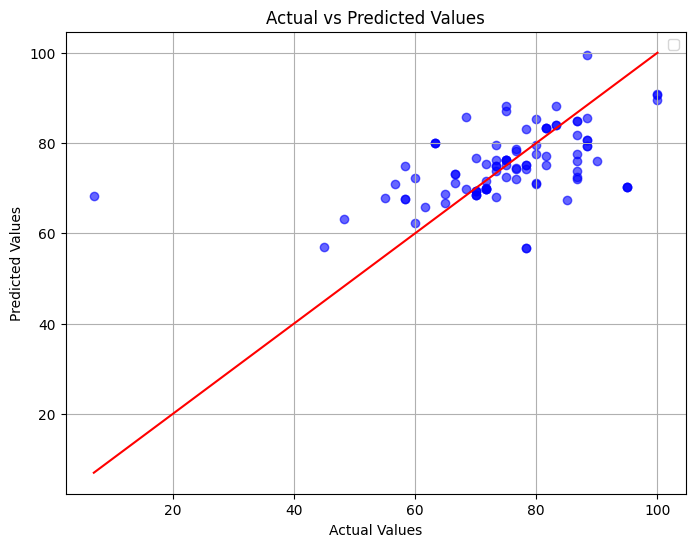

In [367]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid()
plt.legend()
plt.show()

In [368]:
#----logistic Regression

In [369]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
# plt.figure(figsize=(6,6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()


In [370]:
df.head()


,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,post_score,Gender_Male,STATE_East Zone,STATE_North East,...,Previous_Degree_Management,Previous_Degree_Science,Marital_status_Single,Place_you_belong_to_Semi Urban,Place_you_belong_to_Urban,perceived#Job#Skill_prefered skills,perceived#Job#Skill_required skills,Specialization_HR,Specialization_LOS,Specialization_Marketing
0,75.000000,22,71.0,74.8,72.00,61.00,83.333333,True,False,False,...,False,False,True,False,True,True,False,False,False,True
1,71.666667,25,77.6,82.6,76.90,66.85,76.666667,True,False,False,...,False,False,True,True,False,True,False,False,True,False
2,76.666667,26,93.2,83.8,77.00,74.97,75.000000,False,False,False,...,False,False,True,False,True,False,False,False,False,False
3,66.666667,22,91.2,80.0,67.00,68.30,60.000000,True,False,False,...,False,False,True,True,False,True,False,False,False,False
4,71.666667,24,79.8,61.6,60.33,69.28,76.666667,False,False,False,...,False,False,True,False,True,True,False,False,False,False


In [371]:
X

,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,Gender_Male,STATE_East Zone,STATE_North East,STATE_North Zone,...,Previous_Degree_Management,Previous_Degree_Science,Marital_status_Single,Place_you_belong_to_Semi Urban,Place_you_belong_to_Urban,perceived#Job#Skill_prefered skills,perceived#Job#Skill_required skills,Specialization_HR,Specialization_LOS,Specialization_Marketing
0,75.000000,22,71.0,74.8,72.00,61.00,True,False,False,False,...,False,False,True,False,True,True,False,False,False,True
1,71.666667,25,77.6,82.6,76.90,66.85,True,False,False,False,...,False,False,True,True,False,True,False,False,True,False
2,76.666667,26,93.2,83.8,77.00,74.97,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
3,66.666667,22,91.2,80.0,67.00,68.30,True,False,False,False,...,False,False,True,True,False,True,False,False,False,False
4,71.666667,24,79.8,61.6,60.33,69.28,False,False,False,False,...,False,False,True,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,71.666667,22,95.0,78.6,75.43,68.54,True,False,False,False,...,False,False,True,False,True,True,False,False,False,True
469,71.666667,25,77.6,82.6,76.90,66.85,True,False,False,False,...,False,False,True,True,False,True,False,False,True,False
470,76.666667,26,93.2,83.8,77.00,74.97,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
471,66.666667,22,91.2,80.0,67.00,68.30,True,False,False,False,...,False,False,True,True,False,True,False,False,False,False


In [372]:
y

0      83.333333
1      76.666667
2      75.000000
3      60.000000
4      76.666667
         ...    
468    88.333333
469    76.666667
470    75.000000
471    60.000000
472    76.666667
Name: post_score, Length: 473, dtype: float64

In [373]:
df['post_score'] = np.where(df['post_score'] > 50, 1, 0)


In [374]:
X = df.drop('post_score', axis=1)
y = df['post_score']

In [375]:
X

,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,Gender_Male,STATE_East Zone,STATE_North East,STATE_North Zone,...,Previous_Degree_Management,Previous_Degree_Science,Marital_status_Single,Place_you_belong_to_Semi Urban,Place_you_belong_to_Urban,perceived#Job#Skill_prefered skills,perceived#Job#Skill_required skills,Specialization_HR,Specialization_LOS,Specialization_Marketing
0,75.000000,22,71.0,74.8,72.00,61.00,True,False,False,False,...,False,False,True,False,True,True,False,False,False,True
1,71.666667,25,77.6,82.6,76.90,66.85,True,False,False,False,...,False,False,True,True,False,True,False,False,True,False
2,76.666667,26,93.2,83.8,77.00,74.97,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
3,66.666667,22,91.2,80.0,67.00,68.30,True,False,False,False,...,False,False,True,True,False,True,False,False,False,False
4,71.666667,24,79.8,61.6,60.33,69.28,False,False,False,False,...,False,False,True,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,71.666667,22,95.0,78.6,75.43,68.54,True,False,False,False,...,False,False,True,False,True,True,False,False,False,True
469,71.666667,25,77.6,82.6,76.90,66.85,True,False,False,False,...,False,False,True,True,False,True,False,False,True,False
470,76.666667,26,93.2,83.8,77.00,74.97,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
471,66.666667,22,91.2,80.0,67.00,68.30,True,False,False,False,...,False,False,True,True,False,True,False,False,False,False


In [376]:
# Set the target variable to represent MBA admission status
df['Target'] = df["percentage_MBA"]


In [377]:
df

,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,post_score,Gender_Male,STATE_East Zone,STATE_North East,...,Previous_Degree_Science,Marital_status_Single,Place_you_belong_to_Semi Urban,Place_you_belong_to_Urban,perceived#Job#Skill_prefered skills,perceived#Job#Skill_required skills,Specialization_HR,Specialization_LOS,Specialization_Marketing,Target
0,75.000000,22,71.0,74.8,72.00,61.00,1,True,False,False,...,False,True,False,True,True,False,False,False,True,61.00
1,71.666667,25,77.6,82.6,76.90,66.85,1,True,False,False,...,False,True,True,False,True,False,False,True,False,66.85
2,76.666667,26,93.2,83.8,77.00,74.97,1,False,False,False,...,False,True,False,True,False,False,False,False,False,74.97
3,66.666667,22,91.2,80.0,67.00,68.30,1,True,False,False,...,False,True,True,False,True,False,False,False,False,68.30
4,71.666667,24,79.8,61.6,60.33,69.28,1,False,False,False,...,False,True,False,True,True,False,False,False,False,69.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,71.666667,22,95.0,78.6,75.43,68.54,1,True,False,False,...,False,True,False,True,True,False,False,False,True,68.54
469,71.666667,25,77.6,82.6,76.90,66.85,1,True,False,False,...,False,True,True,False,True,False,False,True,False,66.85
470,76.666667,26,93.2,83.8,77.00,74.97,1,False,False,False,...,False,True,False,True,False,False,False,False,False,74.97
471,66.666667,22,91.2,80.0,67.00,68.30,1,True,False,False,...,False,True,True,False,True,False,False,False,False,68.30


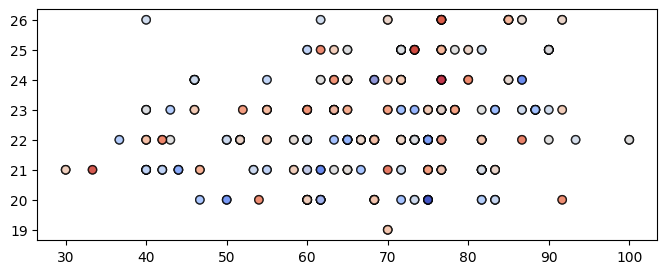

In [378]:
plt.figure(figsize=(8, 3))
plt.scatter(df["pre_score"], df["Age_in_years"], c=df["Target"],cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.show()

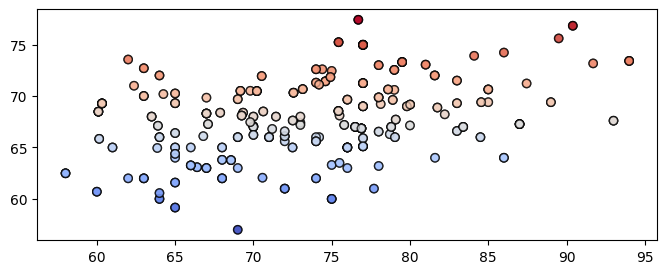

In [379]:
plt.figure(figsize=(8, 3))
plt.scatter(df["Percentage_in_Under_Graduate"], df["percentage_MBA"], c=df["Target"],cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.show()

In [380]:
model1 = LogisticRegression()

In [ ]:
pred = model.predict()

In [382]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [383]:
accuracy_score(y,pred)

0.9682875264270613

In [384]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [385]:
scaler = StandardScaler()


In [386]:
X_train = scaler.fit_transform(X_train)


In [387]:
X_test = scaler.transform(X_test)


In [388]:
model = LogisticRegression()

In [389]:
model.fit(X,y)


LogisticRegression()

In [390]:
pred = model.predict(X_train)


In [391]:
y_pred

array([56.68874002, 69.75419378, 68.26578777, 75.07483498, 85.87384273,
       85.46209985, 80.01771588, 84.02214471, 88.28414676, 75.32748464,
       70.31992165, 74.8915349 , 88.27499092, 84.8279324 , 77.63152665,
       73.87277777, 75.00841735, 75.00841735, 81.70158095, 70.01878412,
       84.02214471, 79.27115102, 76.15843596, 69.45802885, 56.68874002,
       67.59427571, 75.95885026, 90.66035139, 89.48027973, 83.36015081,
       70.90767338, 80.60143082, 69.45802885, 73.12134635, 78.31428797,
       69.75419378, 71.04216731, 78.70184436, 87.0163051 , 83.09175579,
       73.12134635, 68.76033799, 69.79562404, 68.55577689, 67.85874927,
       79.60714558, 74.34419523, 67.99983114, 71.9696249 , 84.8279324 ,
       69.83226976, 76.73215122, 77.11812166, 71.0048515 , 62.19030345,
       77.65405002, 63.1264599 , 68.55577689, 70.31992165, 79.27115102,
       71.24844398, 76.32024439, 76.15843596, 72.09120964, 99.52638784,
       66.64319898, 68.55577689, 72.26705262, 67.48704407, 75.04

In [393]:
y_pred = model.predict(X_test)

In [394]:
pred = model.predict(X)

In [395]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [396]:
accuracy_score(y, pred)

0.9682875264270613

In [397]:
pred_prob = model.predict_proba(X)

In [398]:
np.round(pred_prob[0], decimals=6)

array([0.0085, 0.9915])

In [399]:
pred_prob[60]

array([0.18247193, 0.81752807])

In [400]:
0+1

1

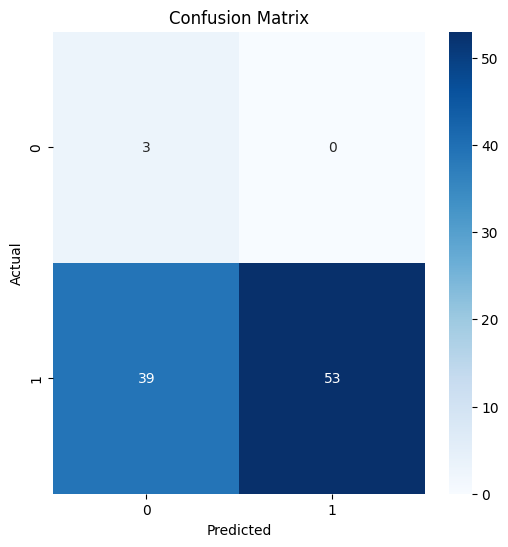

In [401]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### decision_tree ##

In [406]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=234, train_size=0.75)

In [407]:
X_tr.shape

(354, 24)

In [409]:
y_tr.shape

(354,)

In [403]:
model2 = DecisionTreeRegressor()

In [404]:
model2

DecisionTreeRegressor()

In [410]:
model2.fit(X_tr,y_tr)

DecisionTreeRegressor()

In [411]:
y_pr = model.predict(X_te)

In [412]:
y_pr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [413]:
rmse = np.sqrt(mean_squared_error(y_te, y_pr))
rmse

np.float64(0.20498001542269695)

In [415]:
train_accuracy = model2.score(X_train, y_train)
test_accuracy = model2.score(X_test, y_test)    

In [416]:
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: -24.200000000000006
Testing Accuracy: -30.666666666666664


In [425]:
r2_score(y_te, y_pr)

0.24107142857142871

In [426]:
param_list = {
    "max_depth":[1, 2, 3, 4, 5, 6],
    "min_samples_split": [2, 3, 4, 1] ,
    "max_features":[3, 4, 5, 6, 7]
}


In [427]:
gscv = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_list, n_jobs=-1, verbose=True)

In [428]:
gscv

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': [3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 1]},
             verbose=True)

In [429]:
gscv.fit(X_tr, y_tr)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': [3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 1]},
             verbose=True)

In [430]:
gscv.best_params_

{'max_depth': 6, 'max_features': 6, 'min_samples_split': 4}

In [431]:
m = DecisionTreeRegressor(max_depth=6, max_features=7, min_samples_split=2)
m.fit(X_tr, y_tr)
pr = m.predict(X_te)
r2_score(y_te, pr)

0.6728088556851313

### Naive Baye's

In [435]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [442]:
X_tr

,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,Gender_Male,STATE_East Zone,STATE_North East,STATE_North Zone,...,Previous_Degree_Management,Previous_Degree_Science,Marital_status_Single,Place_you_belong_to_Semi Urban,Place_you_belong_to_Urban,perceived#Job#Skill_prefered skills,perceived#Job#Skill_required skills,Specialization_HR,Specialization_LOS,Specialization_Marketing
370,73.333333,22,76.00,79.00,68.00,63.80,True,False,False,False,...,False,False,True,True,False,True,False,False,False,True
245,78.333333,23,87.40,79.80,74.92,71.84,True,False,False,False,...,False,False,True,True,False,False,False,False,False,True
158,76.666667,23,88.60,76.40,74.60,71.43,False,False,False,True,...,False,True,True,False,True,False,False,True,False,False
93,76.666667,25,77.80,62.20,60.10,68.48,True,False,False,True,...,False,False,True,False,True,False,False,False,True,False
159,81.666667,21,70.00,67.00,65.00,59.16,True,False,False,True,...,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,40.000000,21,68.00,88.00,76.00,65.00,True,False,False,False,...,False,False,True,False,True,True,False,False,False,True
185,46.000000,24,82.30,65.50,69.00,66.00,True,False,False,False,...,False,False,True,False,True,False,False,False,False,True
324,42.000000,22,95.52,92.67,79.50,73.30,True,False,False,False,...,False,False,True,False,True,True,False,False,False,False
415,40.000000,21,93.30,91.50,72.50,65.00,True,False,False,False,...,False,False,True,False,True,True,False,False,True,False


In [443]:
X_te

,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,Gender_Male,STATE_East Zone,STATE_North East,STATE_North Zone,...,Previous_Degree_Management,Previous_Degree_Science,Marital_status_Single,Place_you_belong_to_Semi Urban,Place_you_belong_to_Urban,perceived#Job#Skill_prefered skills,perceived#Job#Skill_required skills,Specialization_HR,Specialization_LOS,Specialization_Marketing
54,43.000000,23,79.00,70.00,81.60,64.00,True,True,False,False,...,False,False,True,False,True,True,False,False,False,False
366,81.666667,22,92.80,84.80,78.00,69.87,False,False,False,False,...,False,True,True,False,True,False,False,True,False,False
395,46.000000,24,82.30,65.50,69.00,66.00,True,False,False,False,...,False,False,True,False,True,False,False,False,False,True
49,75.000000,21,85.00,88.00,79.00,70.60,False,True,False,False,...,False,False,True,False,True,True,False,True,False,False
196,73.333333,25,84.50,95.00,75.44,75.23,False,False,False,False,...,False,False,True,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,46.666667,21,84.33,88.70,74.19,71.11,False,False,False,False,...,False,False,True,False,True,True,False,True,False,False
235,65.000000,21,88.89,72.44,93.00,67.60,False,False,False,False,...,False,False,True,False,True,True,False,False,False,True
187,75.000000,22,68.00,88.00,76.00,65.00,True,False,False,False,...,False,False,True,False,True,True,False,False,False,True
231,78.333333,23,95.00,93.00,83.00,71.50,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [444]:
model3= GaussianNB()

In [445]:
model3

GaussianNB()

In [446]:
model3.fit(X_tr, y_tr)

GaussianNB()

In [461]:
accuracy_score(y_te, y_pr)

0.957983193277311

In [462]:
y_pr = model.predict(X_te)

In [469]:
accuracy_score(y_te, y_pr)

0.957983193277311

### Random Forest

In [471]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.75, random_state=42)

In [476]:
model4 = RandomForestClassifier(n_estimators=100, random_state=42)

In [478]:
model4.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [481]:
y_pred = model4.predict(X_test)


In [482]:
accuracy = accuracy_score(y_test, y_pred)

In [483]:
accuracy

1.0

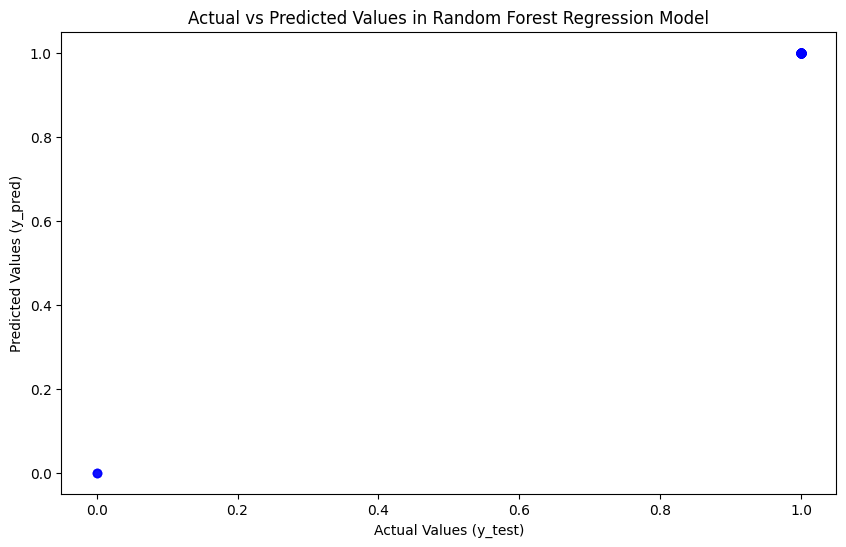

In [502]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.title("Actual vs Predicted Values in Random Forest Regression Model")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.show()

In [489]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [490]:
rmse

np.float64(0.0)

In [496]:
y_pr = model.predict(X_te)

In [497]:
y_pr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [498]:
accuracy_score(y_te, y_pr)

0.9774647887323944

In [ ]:
y_pr = model.predict(X_te)

accuracy_score(y_te, y_pr